<a href="https://colab.research.google.com/github/AnasGamal/quantum-machine-learning-acmse-2025/blob/main/M0_HelloWorldExampleReal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="top"></a>
# ***Installing PennyLane***

In [ ]:
#Installing 'pennylane' package which is used for Quantum Machine Learning

!pip install pennylane

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.5 MB/s eta 0:00:00


# ***Without Optmizers***

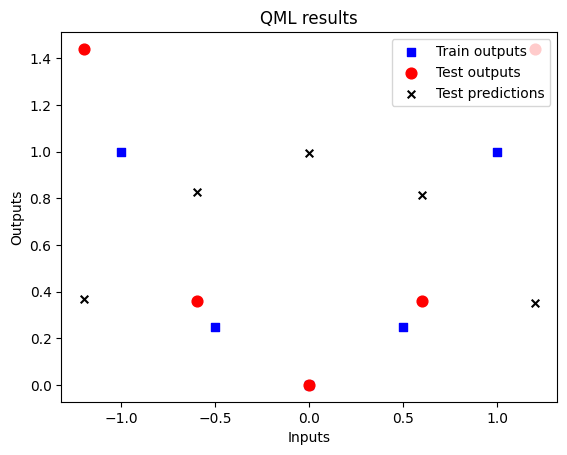

In [ ]:
#SQUARE FUNCTION

# Import the necessary libraries

import pennylane as qml  # for quantum computing operations

from pennylane import numpy as np  # importing numpy from pennylane version for compatibility

import matplotlib.pyplot as plt # for plotting graphs

# Create the training and test data for the square function

X = np.linspace(-1, 1, 5)  # 5 input datapoints from -1 to 1
X.requires_grad = False
Y = X**2  # The outputs for the input datapoints
X_test = np.linspace(-1.2, 1.2, 5)  # 5 test datapoints, shifted from the training data
Y_test = X_test**2  # The outputs for the test datapoints

# Setting up Quantum Device
#Created the quantum device with 1 qubit
dev = qml.device('default.qubit', wires=1)  # 'default.qubit' is simulator from pennylane to run quantum computations

# Create the quantum circuit
@qml.qnode(dev) # defining the decorator
def quantum_circuit(datapoint, params):

    # Encode the input data using an RX rotation
    qml.RX(datapoint, wires=0) # Applies an RX gate to the qubit, encoding the input datapoint into the quantum state

    # Create a rotation based on the angles in "params"
    qml.Rot(params[0], params[1], params[2], wires=0) # Applies a rotation gate based on three parameters (params) which are learned during the optimization process

    # Return the expected value of a measurement along the Z axis
    return qml.expval(qml.PauliZ(wires=0)) # Returns the expected value of measuring the Pauli-Z observable on the qubit

# Define the loss function(Custom Loss function)
def loss_func(predictions): # defining the loss function to calculate total loss with predictions as inputs
    total_losses = 0 # initializing total loss
    for i in range(len(Y)):
        output = Y[i]
        prediction = predictions[i]
        loss = (prediction - output)**2 # calculating squared error for current data point
        total_losses += loss # adding squared errors
    return total_losses

# Define the cost function
def cost_fn(params): # defining the cost function to return total cost (loss)
    predictions = [quantum_circuit(x, params) for x in X]
    cost = loss_func(predictions)
    return cost

# Make an initial guess for the parameters
params = np.array([0.1, 0.1, 0.1], requires_grad=True)

# Test and graph the results
test_predictions = [quantum_circuit(x_test, params) for x_test in X_test]

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(X, Y, s=30, c='b', marker="s", label='Train outputs')
ax1.scatter(X_test, Y_test, s=60, c='r', marker="o", label='Test outputs')
ax1.scatter(X_test, test_predictions, s=30, c='k', marker="x", label='Test predictions')
plt.xlabel("Inputs")
plt.ylabel("Outputs")
plt.title("QML results")

plt.legend(loc='upper right')
plt.show()

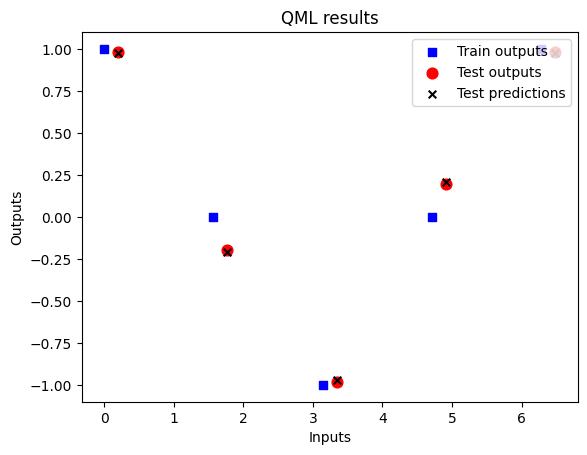

In [ ]:
#COSINE FUNCTION

# Import the necessary libraries

import pennylane as qml  # for quantum computing operations

from pennylane import numpy as np  # importing numpy from pennylane version for compatibility

import matplotlib.pyplot as plt # for plotting graphs

# Create the training and test Data for the cosine function
X = np.linspace(0, 2*np.pi, 5)  # 5 input datapoints from 0 to 2pi
X.requires_grad = False
Y = np.cos(X)  # The outputs for the input datapoints
X_test = np.linspace(0.2, 2*np.pi+0.2, 5)  # 5 test datapoints, shifted from the training data
Y_test = np.cos(X_test)  # The outputs for the test datapoints

# Setting up Quantum Device
#Created the quantum device with 1 qubit
dev = qml.device('default.qubit', wires=1)  # 'default.qubit' is simulator from pennylane to run quantum computations

# Create the quantum circuit
@qml.qnode(dev) # defining the decorator
def quantum_circuit(datapoint, params):

    # Encode the input data using an RX rotation
    qml.RX(datapoint, wires=0) # Applies an RX gate to the qubit, encoding the input datapoint into the quantum state

    # Create a rotation based on the angles in "params"
    qml.Rot(params[0], params[1], params[2], wires=0) # Applies a rotation gate based on three parameters (params) which are learned during the optimization process

    # Return the expected value of a measurement along the Z axis
    return qml.expval(qml.PauliZ(wires=0)) # Returns the expected value of measuring the Pauli-Z observable on the qubit

# Define the loss function(Custom Loss function)
def loss_func(predictions): # defining the loss function to calculate total loss with predictions as inputs
    total_losses = 0 # initializing total loss
    for i in range(len(Y)):
        output = Y[i]
        prediction = predictions[i]
        loss = (prediction - output)**2 # calculating squared error for current data point
        total_losses += loss # adding squared errors
    return total_losses

# Define the cost function
def cost_fn(params): # defining the cost function to return total cost (loss)
    predictions = [quantum_circuit(x, params) for x in X]
    cost = loss_func(predictions)
    return cost

# Make an initial guess for the parameters
params = np.array([0.1, 0.1, 0.1], requires_grad=True)

# Test and graph the results
test_predictions = [quantum_circuit(x_test, params) for x_test in X_test]

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(X, Y, s=30, c='b', marker="s", label='Train outputs')
ax1.scatter(X_test, Y_test, s=60, c='r', marker="o", label='Test outputs')
ax1.scatter(X_test, test_predictions, s=30, c='k', marker="x", label='Test predictions')
plt.xlabel("Inputs")
plt.ylabel("Outputs")
plt.title("QML results")

plt.legend(loc='upper right')
plt.show()

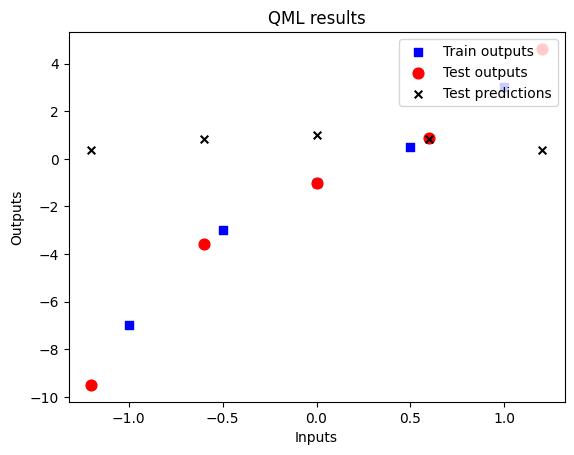

In [ ]:
#POLYNOMIAL FUNCTION

# Import the necessary libraries

import pennylane as qml  # for quantum computing operations

from pennylane import numpy as np  # importing numpy from pennylane version for compatibility

import matplotlib.pyplot as plt # for plotting graphs

# Define the polynomial function f(x) = 2x^3 - x^2 + 3x - 1
def polynomial(x):
    return 2 * x**3 - x**2 + 3 * x - 1

# Create the training and test data for the polynomial function
X = np.linspace(-1, 1, 5)  # 5 input datapoints from -1 to 1
X.requires_grad = False
Y = polynomial(X)  # The outputs for the input datapoints

X_test = np.linspace(-1.2, 1.2, 5)  # 5 test datapoints, shifted from the training data
Y_test = polynomial(X_test)  # The outputs for the test datapoints

# Setting up Quantum Device
#Created the quantum device with 1 qubit
dev = qml.device('default.qubit', wires=1)  # 'default.qubit' is simulator from pennylane to run quantum computations

# Create the quantum circuit
@qml.qnode(dev) # defining the decorator
def quantum_circuit(datapoint, params):

    # Encode the input data using an RX rotation
    qml.RX(datapoint, wires=0) # Applies an RX gate to the qubit, encoding the input datapoint into the quantum state

    # Create a rotation based on the angles in "params"
    qml.Rot(params[0], params[1], params[2], wires=0) # Applies a rotation gate based on three parameters (params) which are learned during the optimization process

    # Return the expected value of a measurement along the Z axis
    return qml.expval(qml.PauliZ(wires=0)) # Returns the expected value of measuring the Pauli-Z observable on the qubit

# Define the loss function(Custom Loss function)
def loss_func(predictions): # defining the loss function to calculate total loss with predictions as inputs
    total_losses = 0 # initializing total loss
    for i in range(len(Y)):
        output = Y[i]
        prediction = predictions[i]
        loss = (prediction - output)**2 # calculating squared error for current data point
        total_losses += loss # adding squared errors
    return total_losses

# Define the cost function
def cost_fn(params): # defining the cost function to return total cost (loss)
    predictions = [quantum_circuit(x, params) for x in X]
    cost = loss_func(predictions)
    return cost

# Make an initial guess for the parameters
params = np.array([0.1, 0.1, 0.1], requires_grad=True)

# Test and graph the results
test_predictions = [quantum_circuit(x_test, params) for x_test in X_test]

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(X, Y, s=30, c='b', marker="s", label='Train outputs')
ax1.scatter(X_test, Y_test, s=60, c='r', marker="o", label='Test outputs')
ax1.scatter(X_test, test_predictions, s=30, c='k', marker="x", label='Test predictions')
plt.xlabel("Inputs")
plt.ylabel("Outputs")
plt.title("QML results")

plt.legend(loc='upper right')
plt.show()

# ***With GradientDescentOptimizer***

Step = 0 Cost = 2.1518902707063785
Step = 10 Cost = 1.386059892354489
Step = 20 Cost = 1.3860598603791487
Step = 30 Cost = 1.3860598603791472
Step = 40 Cost = 1.386059860379147
Step = 50 Cost = 1.386059860379147
Step = 60 Cost = 1.386059860379147
Step = 70 Cost = 1.386059860379147
Step = 80 Cost = 1.386059860379147
Step = 90 Cost = 1.386059860379147


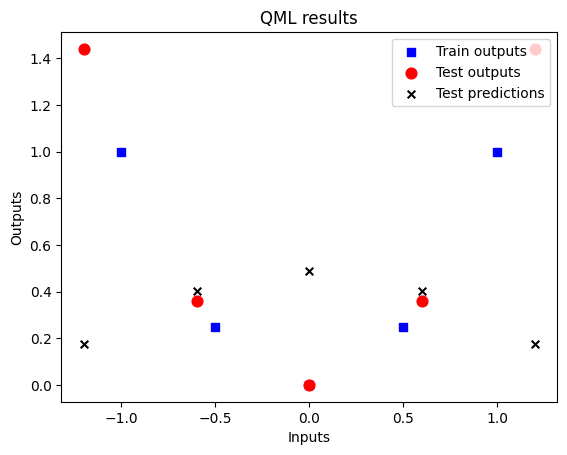

In [ ]:
#SQUARE FUNCTION

# Import the necessary libraries

import pennylane as qml  # for quantum computing operations

from pennylane import numpy as np  # importing numpy from pennylane version for compatibility

import matplotlib.pyplot as plt # for plotting graphs

# Create the training and test data for the square function

X = np.linspace(-1, 1, 5)  # 5 input datapoints from -1 to 1
X.requires_grad = False
Y = X**2  # The outputs for the input datapoints
X_test = np.linspace(-1.2, 1.2, 5)  # 5 test datapoints, shifted from the training data
Y_test = X_test**2  # The outputs for the test datapoints

# Setting up Quantum Device
#Created the quantum device with 1 qubit
dev = qml.device('default.qubit', wires=1)  # 'default.qubit' is simulator from pennylane to run quantum computations

# Create the quantum circuit
@qml.qnode(dev) # defining the decorator
def quantum_circuit(datapoint, params):

    # Encode the input data using an RX rotation
    qml.RX(datapoint, wires=0) # Applies an RX gate to the qubit, encoding the input datapoint into the quantum state

    # Create a rotation based on the angles in "params"
    qml.Rot(params[0], params[1], params[2], wires=0) # Applies a rotation gate based on three parameters (params) which are learned during the optimization process

    # Return the expected value of a measurement along the Z axis
    return qml.expval(qml.PauliZ(wires=0)) # Returns the expected value of measuring the Pauli-Z observable on the qubit

# Define the loss function(Custom Loss function)
def loss_func(predictions): # defining the loss function to calculate total loss with predictions as inputs
    total_losses = 0 # initializing total loss
    for i in range(len(Y)):
        output = Y[i]
        prediction = predictions[i]
        loss = (prediction - output)**2 # calculating squared error for current data point
        total_losses += loss # adding squared errors
    return total_losses

# Define the cost function
def cost_fn(params): # defining the cost function to return total cost (loss)
    predictions = [quantum_circuit(x, params) for x in X]
    cost = loss_func(predictions)
    return cost

# Define the optimizer
#Gradient Descent Optimizer with stepsize 0.3
opt = qml.GradientDescentOptimizer(stepsize=0.3)

# Make an initial guess for the parameters
params = np.array([0.1, 0.1, 0.1], requires_grad=True)

# Optimization loop
# Parameters are updated using GradientDescentOptimizer
# Loop performs optimization to find the best parameters to minimize the loss
for i in range(100):
    params, prev_cost = opt.step_and_cost(cost_fn, params)
    if i % 10 == 0:
        print(f'Step = {i} Cost = {cost_fn(params)}')

# Test and graph the results
test_predictions = [quantum_circuit(x_test, params) for x_test in X_test]

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(X, Y, s=30, c='b', marker="s", label='Train outputs')
ax1.scatter(X_test, Y_test, s=60, c='r', marker="o", label='Test outputs')
ax1.scatter(X_test, test_predictions, s=30, c='k', marker="x", label='Test predictions')
plt.xlabel("Inputs")
plt.ylabel("Outputs")
plt.title("QML results")

plt.legend(loc='upper right')
plt.show()

Step = 0 Cost = 0.00025483635527349827
Step = 10 Cost = 0.00014031215833327604
Step = 20 Cost = 8.862082831220506e-05
Step = 30 Cost = 6.0914940445261915e-05
Step = 40 Cost = 4.4342337140090215e-05
Step = 50 Cost = 3.3641843990215056e-05
Step = 60 Cost = 2.6332133683299248e-05
Step = 70 Cost = 2.1117649302192983e-05
Step = 80 Cost = 1.726788504236411e-05
Step = 90 Cost = 1.4345334687851354e-05


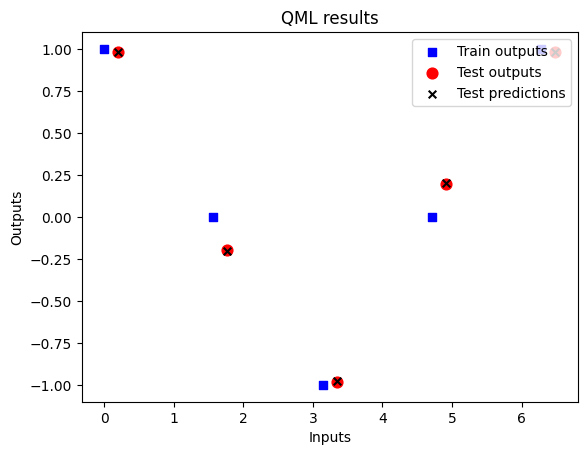

In [ ]:
#COSINE FUNCTION

# Import the necessary libraries

import pennylane as qml  # for quantum computing operations

from pennylane import numpy as np  # importing numpy from pennylane version for compatibility

import matplotlib.pyplot as plt # for plotting graphs

# Create the training and test Data for the cosine function
X = np.linspace(0, 2*np.pi, 5)  # 5 input datapoints from 0 to 2pi
X.requires_grad = False
Y = np.cos(X)  # The outputs for the input datapoints
X_test = np.linspace(0.2, 2*np.pi+0.2, 5)  # 5 test datapoints, shifted from the training data
Y_test = np.cos(X_test)  # The outputs for the test datapoints

# Setting up Quantum Device
#Created the quantum device with 1 qubit
dev = qml.device('default.qubit', wires=1)  # 'default.qubit' is simulator from pennylane to run quantum computations

# Create the quantum circuit
@qml.qnode(dev) # defining the decorator
def quantum_circuit(datapoint, params):

    # Encode the input data using an RX rotation
    qml.RX(datapoint, wires=0) # Applies an RX gate to the qubit, encoding the input datapoint into the quantum state

    # Create a rotation based on the angles in "params"
    qml.Rot(params[0], params[1], params[2], wires=0) # Applies a rotation gate based on three parameters (params) which are learned during the optimization process

    # Return the expected value of a measurement along the Z axis
    return qml.expval(qml.PauliZ(wires=0)) # Returns the expected value of measuring the Pauli-Z observable on the qubit

# Define the loss function(Custom Loss function)
def loss_func(predictions): # defining the loss function to calculate total loss with predictions as inputs
    total_losses = 0 # initializing total loss
    for i in range(len(Y)):
        output = Y[i]
        prediction = predictions[i]
        loss = (prediction - output)**2 # calculating squared error for current data point
        total_losses += loss # adding squared errors
    return total_losses

# Define the cost function
def cost_fn(params): # defining the cost function to return total cost (loss)
    predictions = [quantum_circuit(x, params) for x in X]
    cost = loss_func(predictions)
    return cost

# Define the optimizer
#Gradient Descent Optimizer with stepsize 0.3
opt = qml.GradientDescentOptimizer(stepsize=0.3)

# Make an initial guess for the parameters
params = np.array([0.1, 0.1, 0.1], requires_grad=True)

# Optimization loop
# Parameters are updated using GradientDescentOptimizer
# Loop performs optimization to find the best parameters to minimize the loss
for i in range(100):
    params, prev_cost = opt.step_and_cost(cost_fn, params)
    if i % 10 == 0:
        print(f'Step = {i} Cost = {cost_fn(params)}')

# Test and graph the results
test_predictions = [quantum_circuit(x_test, params) for x_test in X_test]

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(X, Y, s=30, c='b', marker="s", label='Train outputs')
ax1.scatter(X_test, Y_test, s=60, c='r', marker="o", label='Test outputs')
ax1.scatter(X_test, test_predictions, s=30, c='k', marker="x", label='Test predictions')
plt.xlabel("Inputs")
plt.ylabel("Outputs")
plt.title("QML results")

plt.legend(loc='upper right')
plt.show()

Step = 0 Cost = 82.0422337915682
Step = 10 Cost = 70.5033463742235
Step = 20 Cost = 76.40919225232061
Step = 30 Cost = 64.88454763308712
Step = 40 Cost = 52.43197615754127
Step = 50 Cost = 79.30103664474845
Step = 60 Cost = 91.19601572861038
Step = 70 Cost = 58.26355226930386
Step = 80 Cost = 89.83639306004746
Step = 90 Cost = 55.099472288186426


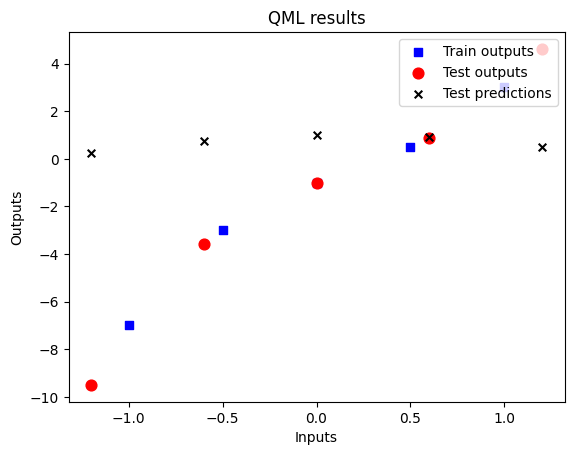

In [ ]:
#POLYNOMIAL FUNCTION

# Import the necessary libraries

import pennylane as qml  # for quantum computing operations

from pennylane import numpy as np  # importing numpy from pennylane version for compatibility

import matplotlib.pyplot as plt # for plotting graphs

# Define the polynomial function f(x) = 2x^3 - x^2 + 3x - 1
def polynomial(x):
    return 2 * x**3 - x**2 + 3 * x - 1

# Create the training and test data for the polynomial function
X = np.linspace(-1, 1, 5)  # 5 input datapoints from -1 to 1
X.requires_grad = False
Y = polynomial(X)  # The outputs for the input datapoints

X_test = np.linspace(-1.2, 1.2, 5)  # 5 test datapoints, shifted from the training data
Y_test = polynomial(X_test)  # The outputs for the test datapoints

# Setting up Quantum Device
#Created the quantum device with 1 qubit
dev = qml.device('default.qubit', wires=1)  # 'default.qubit' is simulator from pennylane to run quantum computations

# Create the quantum circuit
@qml.qnode(dev) # defining the decorator
def quantum_circuit(datapoint, params):

    # Encode the input data using an RX rotation
    qml.RX(datapoint, wires=0) # Applies an RX gate to the qubit, encoding the input datapoint into the quantum state

    # Create a rotation based on the angles in "params"
    qml.Rot(params[0], params[1], params[2], wires=0) # Applies a rotation gate based on three parameters (params) which are learned during the optimization process

    # Return the expected value of a measurement along the Z axis
    return qml.expval(qml.PauliZ(wires=0)) # Returns the expected value of measuring the Pauli-Z observable on the qubit

# Define the loss function(Custom Loss function)
def loss_func(predictions): # defining the loss function to calculate total loss with predictions as inputs
    total_losses = 0 # initializing total loss
    for i in range(len(Y)):
        output = Y[i]
        prediction = predictions[i]
        loss = (prediction - output)**2 # calculating squared error for current data point
        total_losses += loss # adding squared errors
    return total_losses

# Define the cost function
def cost_fn(params): # defining the cost function to return total cost (loss)
    predictions = [quantum_circuit(x, params) for x in X]
    cost = loss_func(predictions)
    return cost

# Define the optimizer
#Gradient Descent Optimizer with stepsize 0.3
opt = qml.GradientDescentOptimizer(stepsize=0.3)

# Make an initial guess for the parameters
params = np.array([0.1, 0.1, 0.1], requires_grad=True)

# Optimization loop
# Parameters are updated using GradientDescentOptimizer
# Loop performs optimization to find the best parameters to minimize the loss
for i in range(100):
    params, prev_cost = opt.step_and_cost(cost_fn, params)
    if i % 10 == 0:
        print(f'Step = {i} Cost = {cost_fn(params)}')

# Test and graph the results
test_predictions = [quantum_circuit(x_test, params) for x_test in X_test]

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(X, Y, s=30, c='b', marker="s", label='Train outputs')
ax1.scatter(X_test, Y_test, s=60, c='r', marker="o", label='Test outputs')
ax1.scatter(X_test, test_predictions, s=30, c='k', marker="x", label='Test predictions')
plt.xlabel("Inputs")
plt.ylabel("Outputs")
plt.title("QML results")

plt.legend(loc='upper right')
plt.show()

# ***With Manual Gradient Descent Optmizer***

Step = 0 Cost = 2.194593768177443
Step = 10 Cost = 1.3860600326275794
Step = 20 Cost = 1.3860598603791554
Step = 30 Cost = 1.3860598603791467
Step = 40 Cost = 1.3860598603791474
Step = 50 Cost = 1.3860598603791472
Step = 60 Cost = 1.3860598603791472
Step = 70 Cost = 1.3860598603791472
Step = 80 Cost = 1.3860598603791472
Step = 90 Cost = 1.3860598603791472


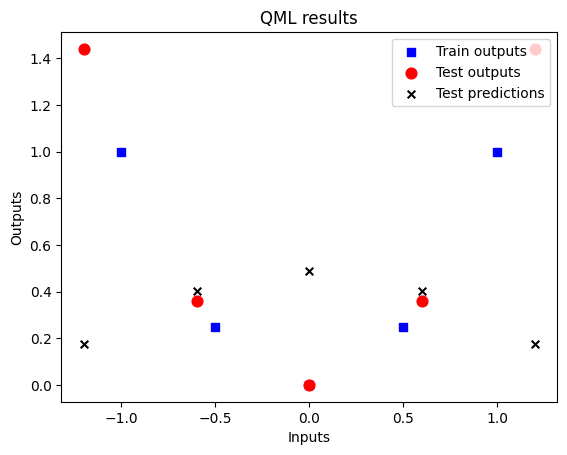

In [ ]:
#SQUARE FUNCTION

# Import the necessary libraries

import pennylane as qml  # for quantum computing operations

from pennylane import numpy as np  # importing numpy from pennylane version for compatibility

import matplotlib.pyplot as plt # for plotting graphs

# Create the training and test data for the square function

X = np.linspace(-1, 1, 5)  # 5 input datapoints from -1 to 1
X.requires_grad = False
Y = X**2  # The outputs for the input datapoints
X_test = np.linspace(-1.2, 1.2, 5)  # 5 test datapoints, shifted from the training data
Y_test = X_test**2  # The outputs for the test datapoints

# Setting up Quantum Device
#Created the quantum device with 1 qubit
dev = qml.device('default.qubit', wires=1)  # 'default.qubit' is simulator from pennylane to run quantum computations

# Create the quantum circuit
@qml.qnode(dev) # defining the decorator
def quantum_circuit(datapoint, params):

    # Encode the input data using an RX rotation
    qml.RX(datapoint, wires=0) # Applies an RX gate to the qubit, encoding the input datapoint into the quantum state

    # Create a rotation based on the angles in "params"
    qml.Rot(params[0], params[1], params[2], wires=0) # Applies a rotation gate based on three parameters (params) which are learned during the optimization process

    # Return the expected value of a measurement along the Z axis
    return qml.expval(qml.PauliZ(wires=0)) # Returns the expected value of measuring the Pauli-Z observable on the qubit

# Define the loss function(Custom Loss function)
def loss_func(predictions): # defining the loss function to calculate total loss with predictions as inputs
    total_losses = 0 # initializing total loss
    for i in range(len(Y)):
        output = Y[i]
        prediction = predictions[i]
        loss = (prediction - output)**2 # calculating squared error for current data point
        total_losses += loss # adding squared errors
    return total_losses

# Define the cost function
def cost_fn(params): # defining the cost function to return total cost (loss)
    predictions = [quantum_circuit(x, params) for x in X]
    cost = loss_func(predictions)
    return cost

# Define the optimizer

# Make an initial guess for the parameters
params = np.array([0.1, 0.1, 0.1], requires_grad=True)

# Optimization loop
# Manual gradient descent optimization loop
num_steps = 100
prev_cost = float('inf')
learning_rate = 0.3

for i in range(num_steps):
    predictions = [quantum_circuit(x, params) for x in X]
    cost = loss_func(predictions)

    # Compute the gradient of the cost function
    grad_cost = qml.grad(cost_fn)(params)

    # Update the parameters using gradient descent
    params -= learning_rate * grad_cost

    if i % 10 == 0:
        print(f'Step = {i} Cost = {cost}')

# Test and graph the results
test_predictions = [quantum_circuit(x_test, params) for x_test in X_test]

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(X, Y, s=30, c='b', marker="s", label='Train outputs')
ax1.scatter(X_test, Y_test, s=60, c='r', marker="o", label='Test outputs')
ax1.scatter(X_test, test_predictions, s=30, c='k', marker="x", label='Test predictions')
plt.xlabel("Inputs")
plt.ylabel("Outputs")
plt.title("QML results")

plt.legend(loc='upper right')
plt.show()

Step = 0 Cost = 0.00027354575318748854
Step = 10 Cost = 0.0001478409908702307
Step = 20 Cost = 9.238011669133492e-05
Step = 30 Cost = 6.305777360432545e-05
Step = 40 Cost = 4.56783913029883e-05
Step = 50 Cost = 3.4530656904631985e-05
Step = 60 Cost = 2.6953137191792965e-05
Step = 70 Cost = 2.1568517639594594e-05
Step = 80 Cost = 1.7605487311755152e-05
Step = 90 Cost = 1.4604608714798024e-05


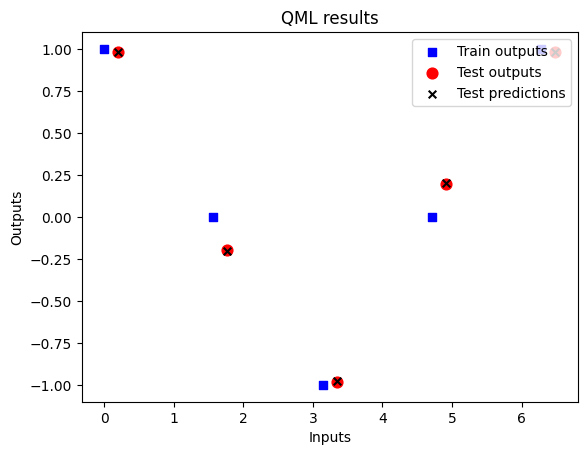

In [ ]:
#COSINE FUNCTION

# Import the necessary libraries

import pennylane as qml  # for quantum computing operations

from pennylane import numpy as np  # importing numpy from pennylane version for compatibility

import matplotlib.pyplot as plt # for plotting graphs

# Create the training and test Data for the cosine function
X = np.linspace(0, 2*np.pi, 5)  # 5 input datapoints from 0 to 2pi
X.requires_grad = False
Y = np.cos(X)  # The outputs for the input datapoints
X_test = np.linspace(0.2, 2*np.pi+0.2, 5)  # 5 test datapoints, shifted from the training data
Y_test = np.cos(X_test)  # The outputs for the test datapoints

# Setting up Quantum Device
#Created the quantum device with 1 qubit
dev = qml.device('default.qubit', wires=1)  # 'default.qubit' is simulator from pennylane to run quantum computations

# Create the quantum circuit
@qml.qnode(dev) # defining the decorator
def quantum_circuit(datapoint, params):

    # Encode the input data using an RX rotation
    qml.RX(datapoint, wires=0) # Applies an RX gate to the qubit, encoding the input datapoint into the quantum state

    # Create a rotation based on the angles in "params"
    qml.Rot(params[0], params[1], params[2], wires=0) # Applies a rotation gate based on three parameters (params) which are learned during the optimization process

    # Return the expected value of a measurement along the Z axis
    return qml.expval(qml.PauliZ(wires=0)) # Returns the expected value of measuring the Pauli-Z observable on the qubit

# Define the loss function(Custom Loss function)
def loss_func(predictions): # defining the loss function to calculate total loss with predictions as inputs
    total_losses = 0 # initializing total loss
    for i in range(len(Y)):
        output = Y[i]
        prediction = predictions[i]
        loss = (prediction - output)**2 # calculating squared error for current data point
        total_losses += loss # adding squared errors
    return total_losses

# Define the cost function
def cost_fn(params): # defining the cost function to return total cost (loss)
    predictions = [quantum_circuit(x, params) for x in X]
    cost = loss_func(predictions)
    return cost

# Define the optimizer

# Make an initial guess for the parameters
params = np.array([0.1, 0.1, 0.1], requires_grad=True)

# Optimization loop
# Manual gradient descent optimization loop
num_steps = 100
prev_cost = float('inf')
learning_rate = 0.3

for i in range(num_steps):
    predictions = [quantum_circuit(x, params) for x in X]
    cost = loss_func(predictions)

    # Compute the gradient of the cost function
    grad_cost = qml.grad(cost_fn)(params)

    # Update the parameters using gradient descent
    params -= learning_rate * grad_cost

    if i % 10 == 0:
        print(f'Step = {i} Cost = {cost}')

# Test and graph the results
test_predictions = [quantum_circuit(x_test, params) for x_test in X_test]

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(X, Y, s=30, c='b', marker="s", label='Train outputs')
ax1.scatter(X_test, Y_test, s=60, c='r', marker="o", label='Test outputs')
ax1.scatter(X_test, test_predictions, s=30, c='k', marker="x", label='Test predictions')
plt.xlabel("Inputs")
plt.ylabel("Outputs")
plt.title("QML results")

plt.legend(loc='upper right')
plt.show()

Step = 0 Cost = 82.20121049818525
Step = 10 Cost = 76.50855220622037
Step = 20 Cost = 87.1534710528145
Step = 30 Cost = 92.33742583787432
Step = 40 Cost = 69.24852992692884
Step = 50 Cost = 54.96205482456979
Step = 60 Cost = 80.03489555375276
Step = 70 Cost = 68.69809028114997
Step = 80 Cost = 82.96522538864359
Step = 90 Cost = 58.72515189247955


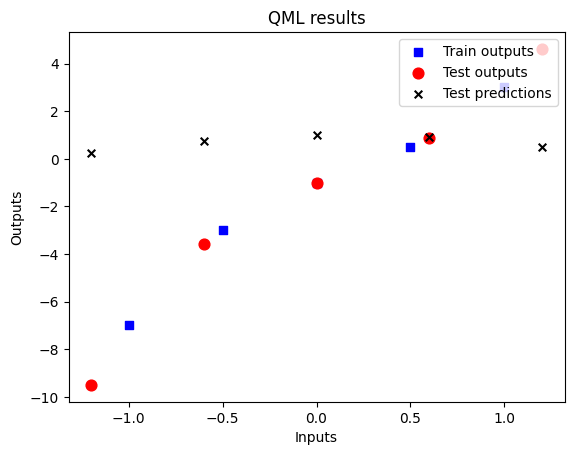

In [ ]:
#POLYNOMIAL FUNCTION

# Import the necessary libraries

import pennylane as qml  # for quantum computing operations

from pennylane import numpy as np  # importing numpy from pennylane version for compatibility

import matplotlib.pyplot as plt # for plotting graphs

# Define the polynomial function f(x) = 2x^3 - x^2 + 3x - 1
def polynomial(x):
    return 2 * x**3 - x**2 + 3 * x - 1

# Create the training and test data for the polynomial function
X = np.linspace(-1, 1, 5)  # 5 input datapoints from -1 to 1
X.requires_grad = False
Y = polynomial(X)  # The outputs for the input datapoints

X_test = np.linspace(-1.2, 1.2, 5)  # 5 test datapoints, shifted from the training data
Y_test = polynomial(X_test)  # The outputs for the test datapoints

# Setting up Quantum Device
#Created the quantum device with 1 qubit
dev = qml.device('default.qubit', wires=1)  # 'default.qubit' is simulator from pennylane to run quantum computations

# Create the quantum circuit
@qml.qnode(dev) # defining the decorator
def quantum_circuit(datapoint, params):

    # Encode the input data using an RX rotation
    qml.RX(datapoint, wires=0) # Applies an RX gate to the qubit, encoding the input datapoint into the quantum state

    # Create a rotation based on the angles in "params"
    qml.Rot(params[0], params[1], params[2], wires=0) # Applies a rotation gate based on three parameters (params) which are learned during the optimization process

    # Return the expected value of a measurement along the Z axis
    return qml.expval(qml.PauliZ(wires=0)) # Returns the expected value of measuring the Pauli-Z observable on the qubit

# Define the loss function(Custom Loss function)
def loss_func(predictions): # defining the loss function to calculate total loss with predictions as inputs
    total_losses = 0 # initializing total loss
    for i in range(len(Y)):
        output = Y[i]
        prediction = predictions[i]
        loss = (prediction - output)**2 # calculating squared error for current data point
        total_losses += loss # adding squared errors
    return total_losses

# Define the cost function
def cost_fn(params): # defining the cost function to return total cost (loss)
    predictions = [quantum_circuit(x, params) for x in X]
    cost = loss_func(predictions)
    return cost

# Define the optimizer

# Make an initial guess for the parameters
params = np.array([0.1, 0.1, 0.1], requires_grad=True)

# Optimization loop
# Manual gradient descent optimization loop
num_steps = 100
prev_cost = float('inf')
learning_rate = 0.3

for i in range(num_steps):
    predictions = [quantum_circuit(x, params) for x in X]
    cost = loss_func(predictions)

    # Compute the gradient of the cost function
    grad_cost = qml.grad(cost_fn)(params)

    # Update the parameters using gradient descent
    params -= learning_rate * grad_cost

    if i % 10 == 0:
        print(f'Step = {i} Cost = {cost}')


# Test and graph the results
test_predictions = [quantum_circuit(x_test, params) for x_test in X_test]

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(X, Y, s=30, c='b', marker="s", label='Train outputs')
ax1.scatter(X_test, Y_test, s=60, c='r', marker="o", label='Test outputs')
ax1.scatter(X_test, test_predictions, s=30, c='k', marker="x", label='Test predictions')
plt.xlabel("Inputs")
plt.ylabel("Outputs")
plt.title("QML results")

plt.legend(loc='upper right')
plt.show()